# K Nearest Neighbors Project 

Welcome to the KNN Project! Go ahead and just follow the directions below.
## Import Libraries
**Import pandas,seaborn, and the usual libraries.**

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

## Get the Data
** Read the 'KNN_Project_Data csv file into a dataframe **

In [2]:
df = pd.read_csv("KNN-Assignment.csv")



**Check the head of the dataframe.**

In [3]:
df.head()


XVPM         GWYH         TRAT        TLLZ         IGGA  \
0  1636.670614   817.988525  2565.995189  358.347163   550.417491   
1  1013.402760   577.587332  2644.141273  280.428203  1161.873391   
2  1300.035501   820.518697  2025.854469  525.562292   922.206261   
3  1059.347542  1066.866418   612.000041  480.827789   419.467495   
4  1018.340526  1313.679056   950.622661  724.742175   843.065903   

          HYKR         EDFS        GUUB         MGJM         JHZC  \
0  1618.870897  2147.641254  330.727893  1494.878631   845.136088   
1  2084.107872   853.404981  447.157619  1193.032521   861.081809   
2  2552.355407   818.676686  845.491492  1968.367513  1647.186291   
3   685.666983   852.867810  341.664784  1154.391368  1450.935357   
4  1370.554164   905.469453  658.118202   539.459350  1899.850792   

   TARGET CLASS  
0             0  
1             1  
2             1  
3             0  
4             0

XVPM         GWYH         TRAT        TLLZ         IGGA  \
0  1636.670614   817.988525  2565.995189  358.347163   550.417491   
1  1013.402760   577.587332  2644.141273  280.428203  1161.873391   
2  1300.035501   820.518697  2025.854469  525.562292   922.206261   
3  1059.347542  1066.866418   612.000041  480.827789   419.467495   
4  1018.340526  1313.679056   950.622661  724.742175   843.065903   

          HYKR         EDFS        GUUB         MGJM         JHZC  \
0  1618.870897  2147.641254  330.727893  1494.878631   845.136088   
1  2084.107872   853.404981  447.157619  1193.032521   861.081809   
2  2552.355407   818.676686  845.491492  1968.367513  1647.186291   
3   685.666983   852.867810  341.664784  1154.391368  1450.935357   
4  1370.554164   905.469453  658.118202   539.459350  1899.850792   

   TARGET CLASS  
0             0  
1             1  
2             1  
3             0  
4             0

In [4]:
df.shape

(1000, 11)

(1000, 11)

 we have 768 rows and 9 columns. The first 8 columns represent the features and the last column represent the target/label.

# EDA

Since this data is artificial, we'll just do a large pairplot with seaborn.

**Use seaborn on the dataframe to create a pairplot with the hue indicated by the TARGET CLASS column.**

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


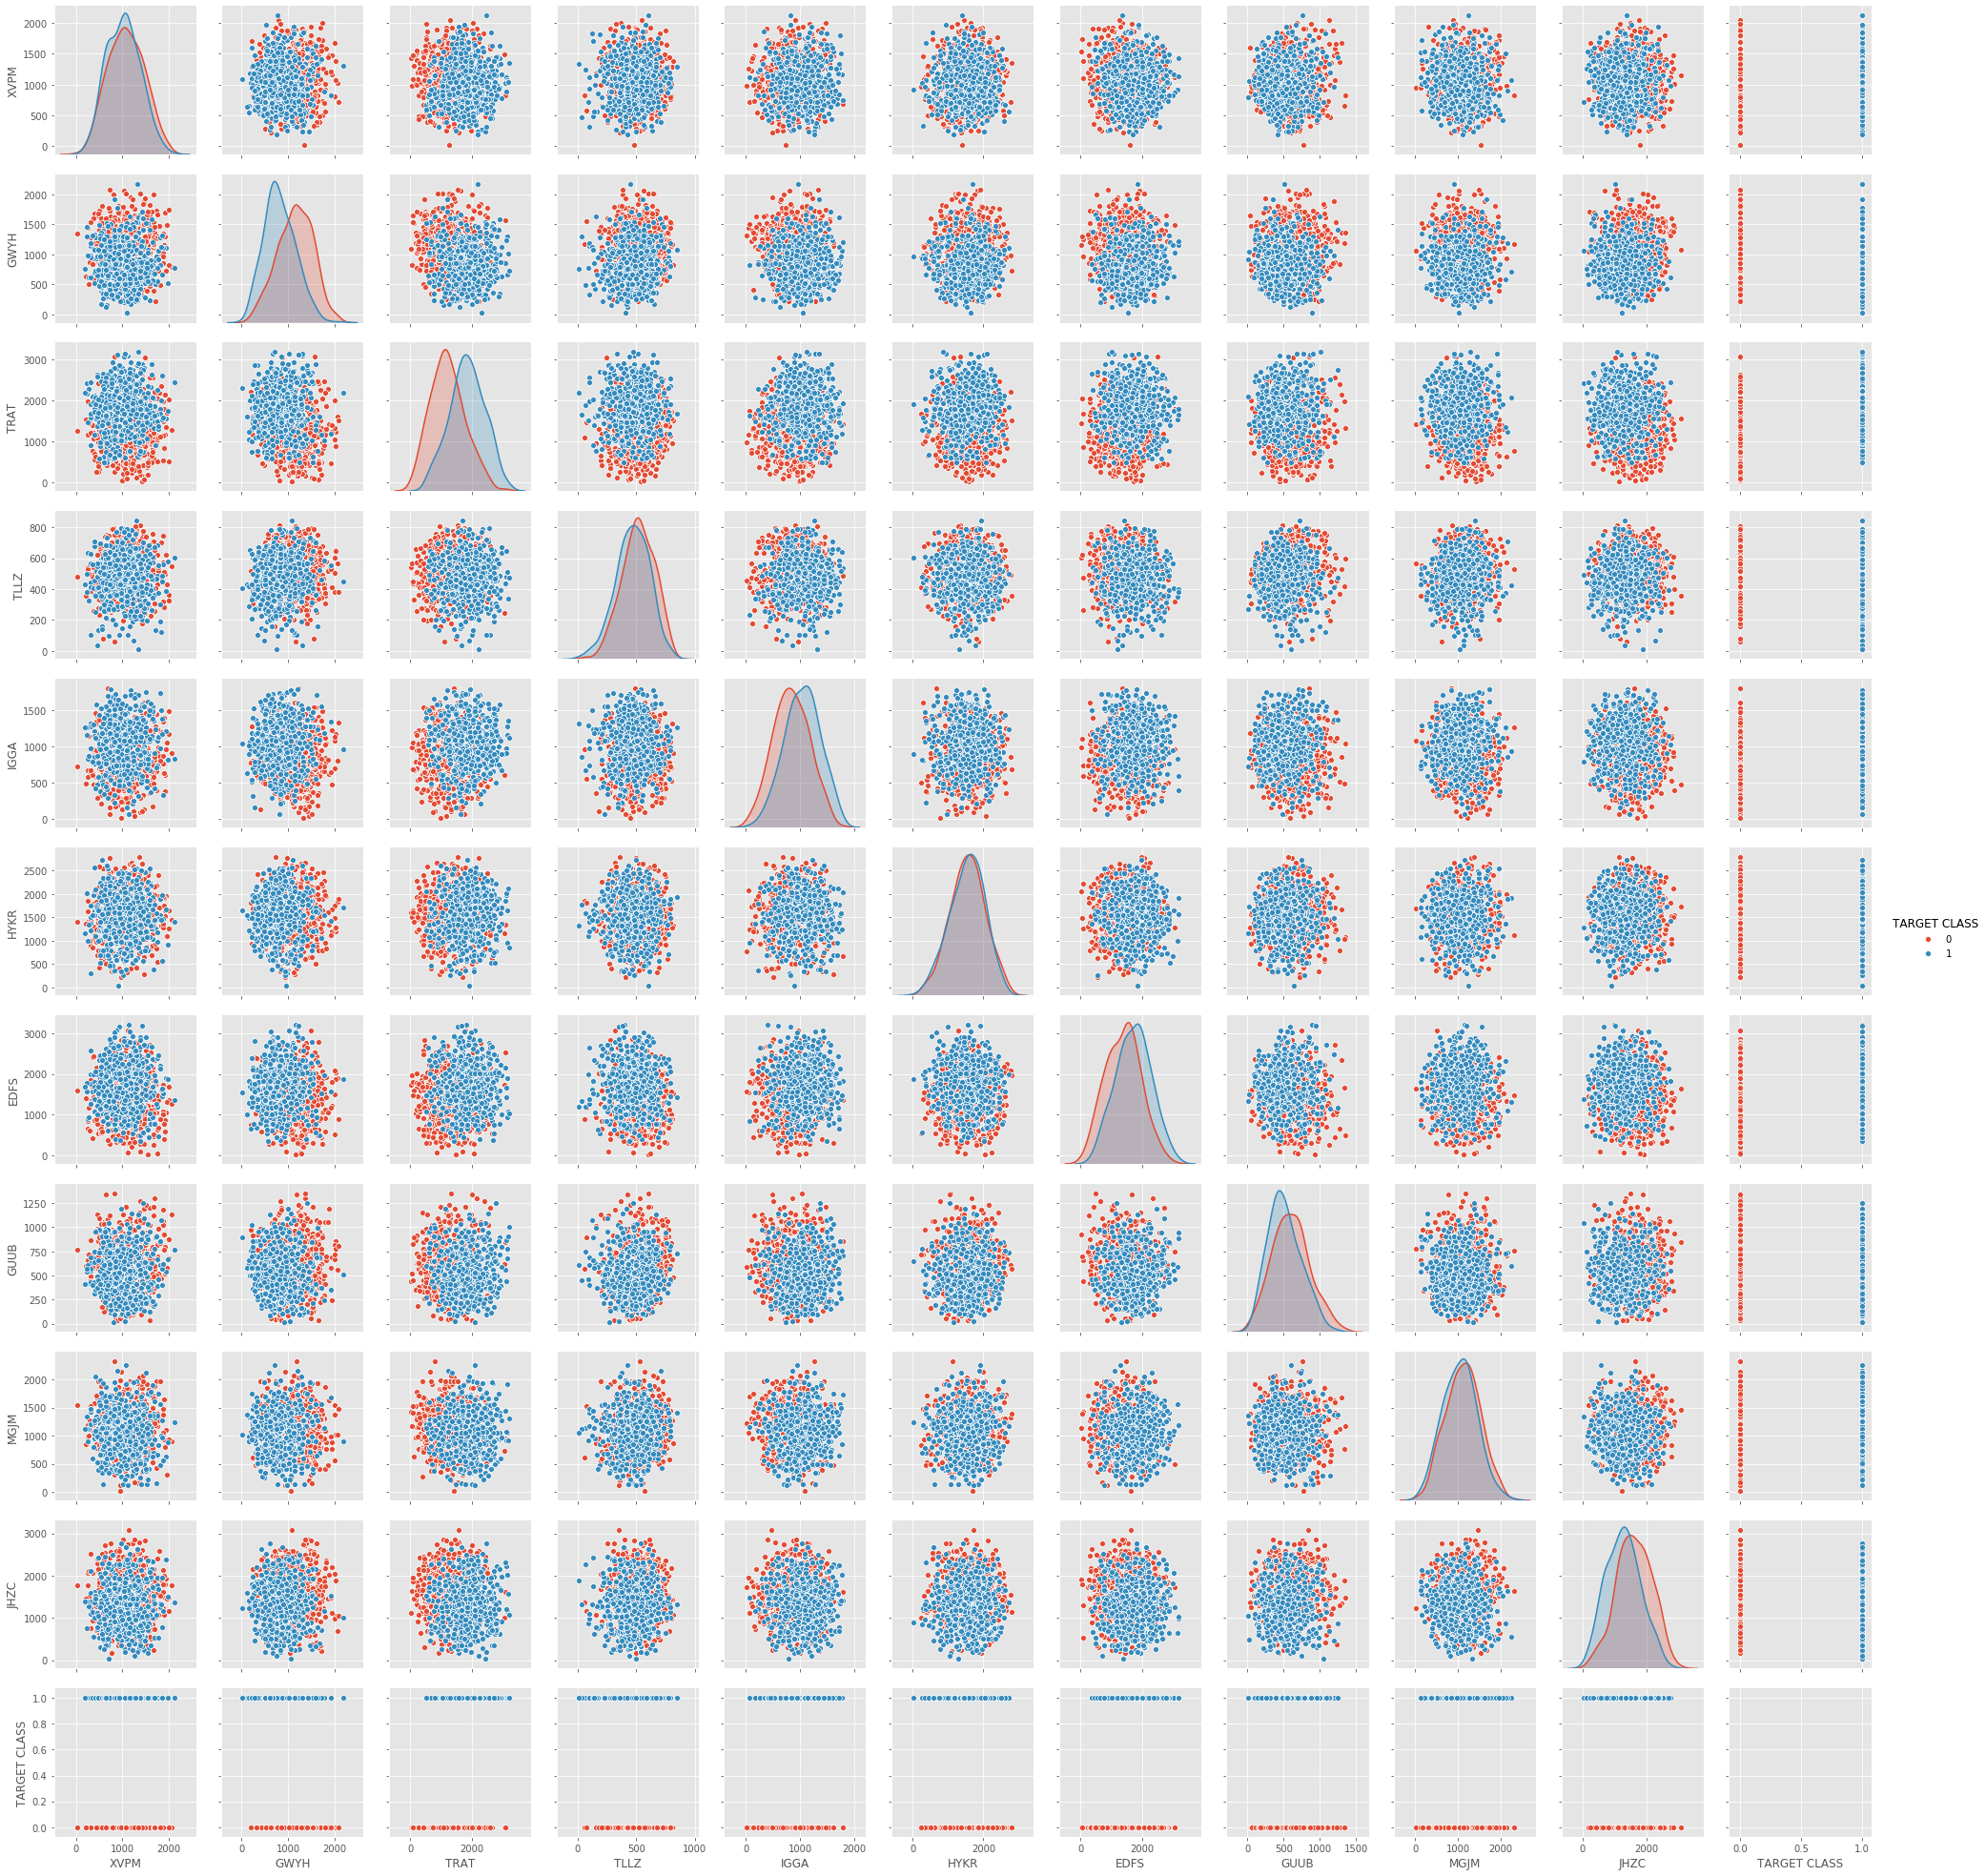

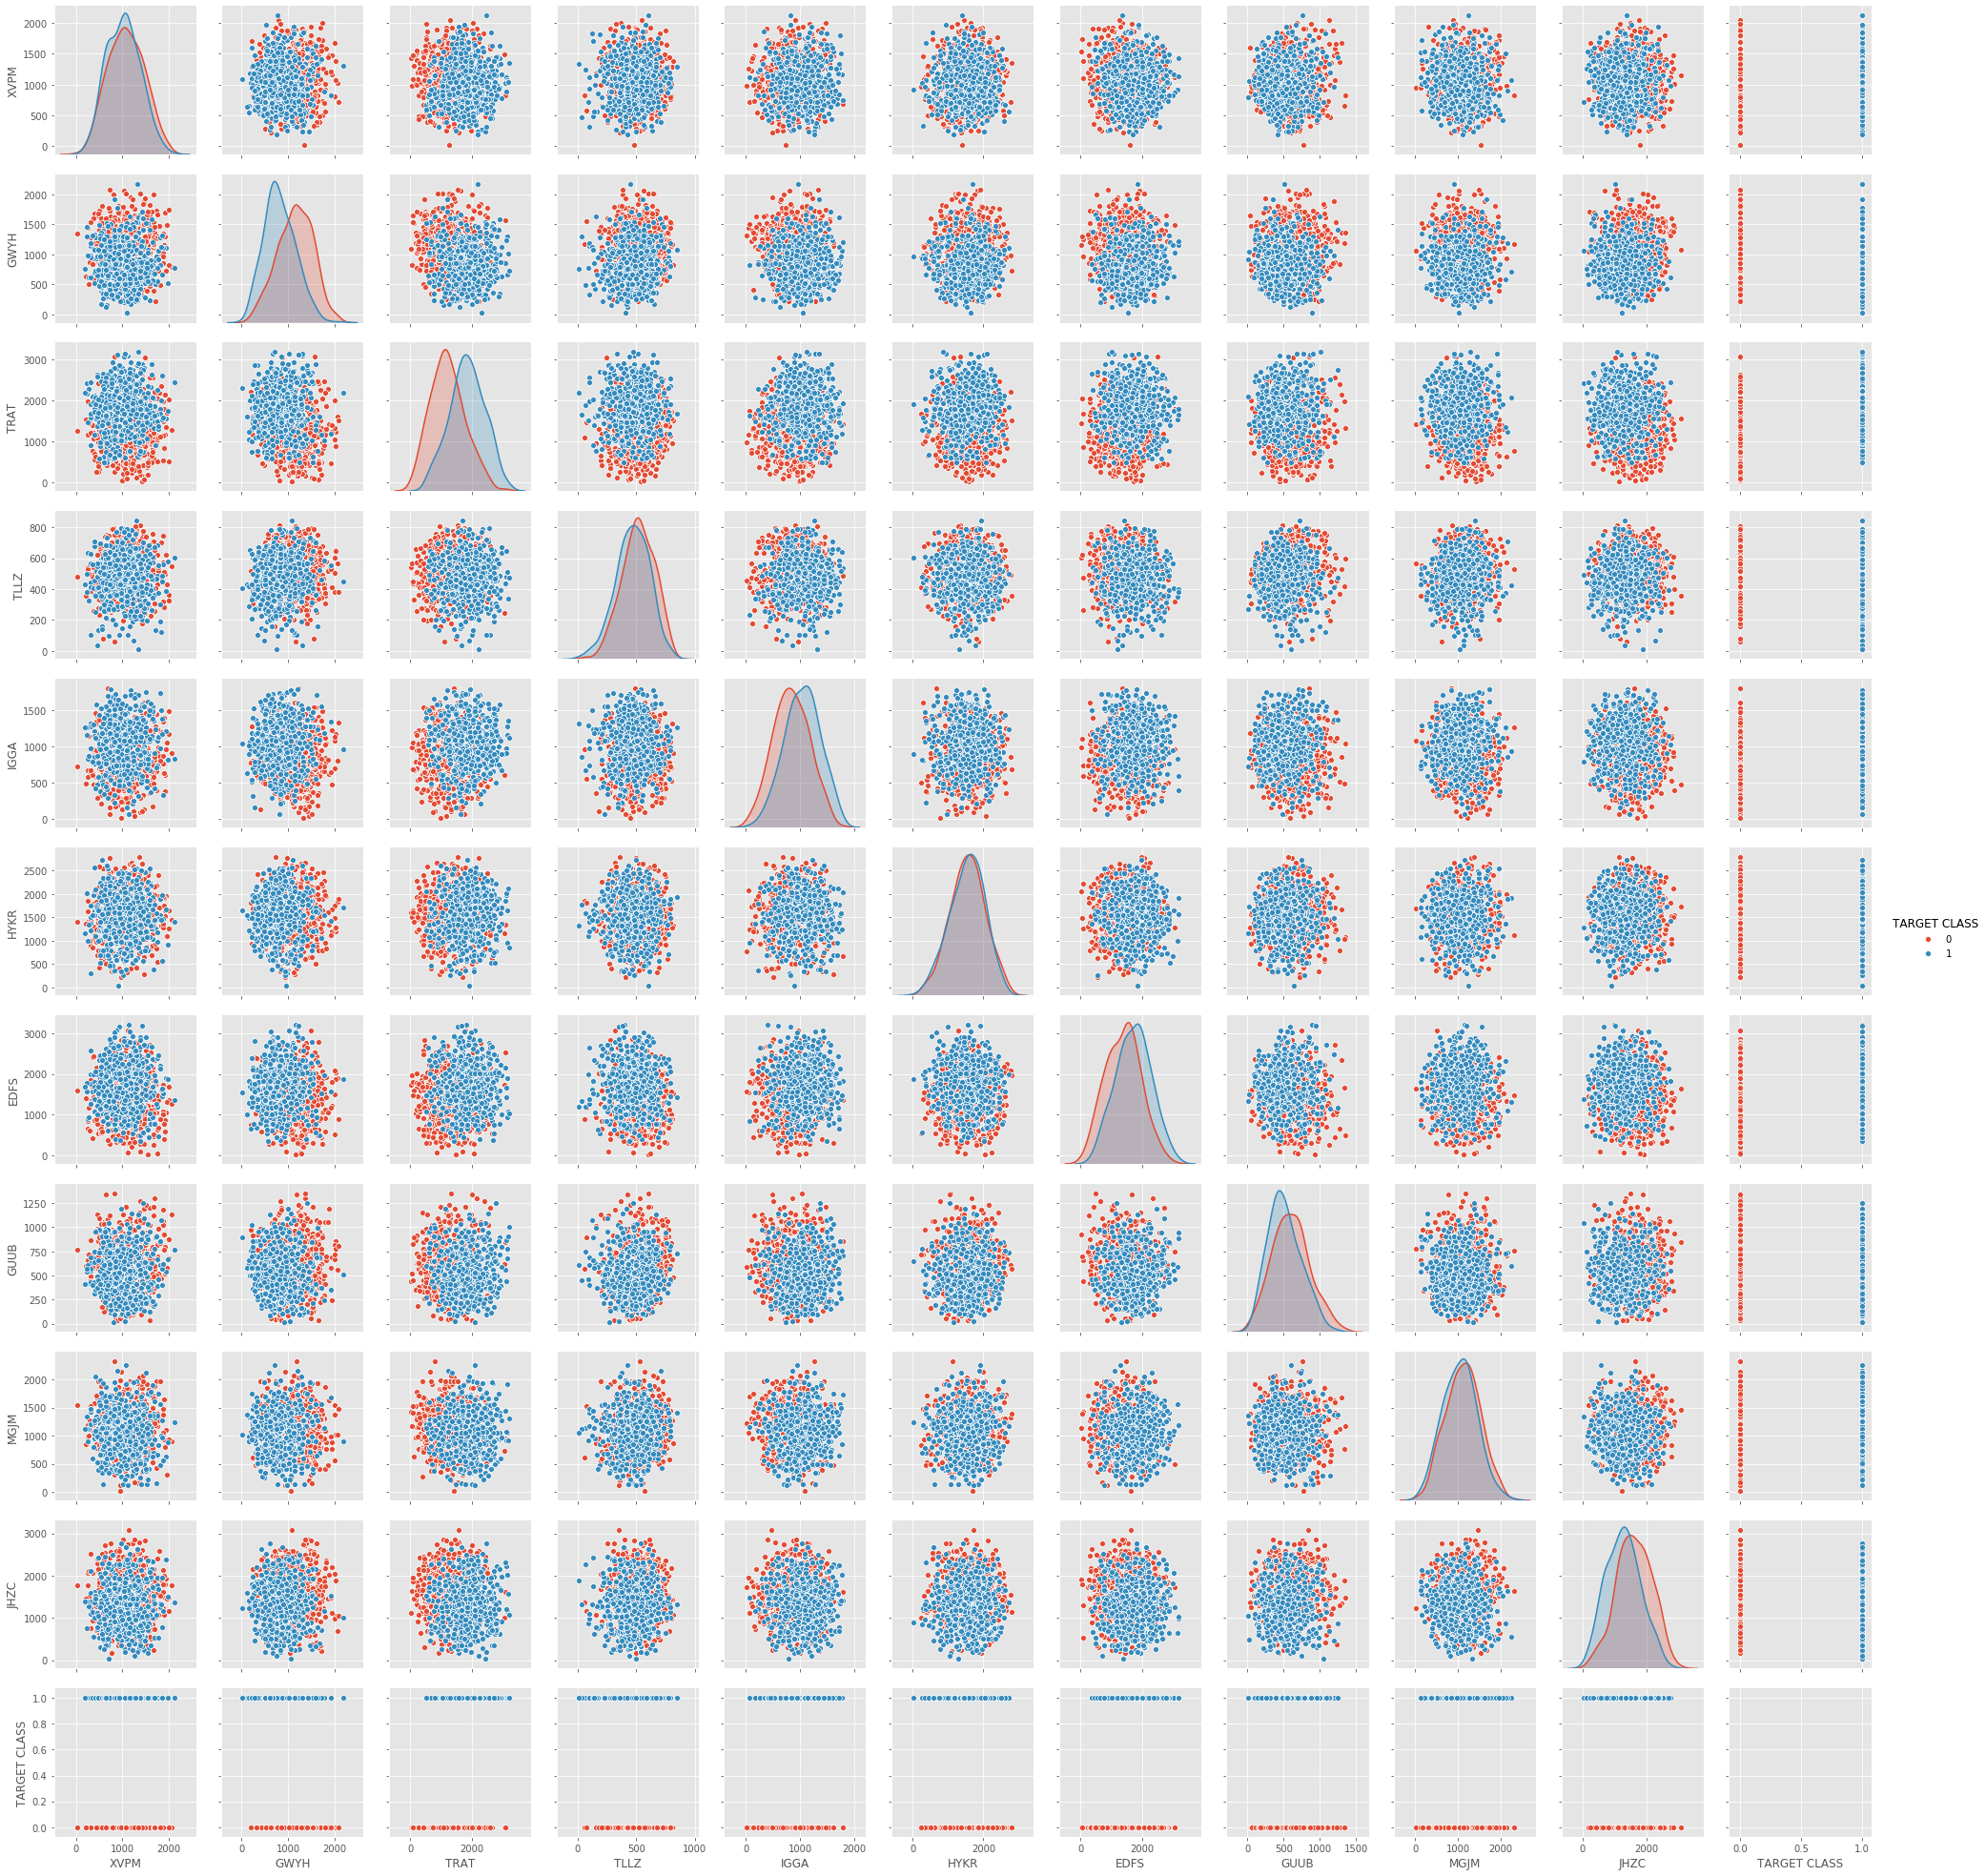

In [5]:
sns.pairplot(df, hue = 'TARGET CLASS')

# Standardize the Variables

Time to standardize the variables.

** Import StandardScaler from Scikit learn.**

In [6]:
from sklearn.preprocessing import StandardScaler

** Create a StandardScaler() object called scaler.**

In [7]:
scaler = StandardScaler()

** Fit scaler to the features.**

In [8]:
scaler.fit(df.drop(['TARGET CLASS'], axis=1))

StandardScaler()

StandardScaler()

**Use the .transform() method to transform the features to a scaled version.**

In [9]:
scaler.transform(df.drop(['TARGET CLASS'], axis=1))

array([[ 1.56852168, -0.44343461,  1.61980773, ..., -0.93279392,
         1.00831307, -1.06962723],
       [-0.11237594, -1.05657361,  1.7419175 , ..., -0.46186435,
         0.25832069, -1.04154625],
       [ 0.66064691, -0.43698145,  0.77579285, ...,  1.14929806,
         2.1847836 ,  0.34281129],
       ...,
       [-0.35889496, -0.97901454,  0.83771499, ..., -1.51472604,
        -0.27512225,  0.86428656],
       [ 0.27507999, -0.99239881,  0.0303711 , ..., -0.03623294,
         0.43668516, -0.21245586],
       [ 0.62589593,  0.79510909,  1.12180047, ..., -1.25156478,
        -0.60352946, -0.87985868]])

array([[ 1.56852168, -0.44343461,  1.61980773, ..., -0.93279392,
         1.00831307, -1.06962723],
       [-0.11237594, -1.05657361,  1.7419175 , ..., -0.46186435,
         0.25832069, -1.04154625],
       [ 0.66064691, -0.43698145,  0.77579285, ...,  1.14929806,
         2.1847836 ,  0.34281129],
       ...,
       [-0.35889496, -0.97901454,  0.83771499, ..., -1.51472604,
        -0.27512225,  0.86428656],
       [ 0.27507999, -0.99239881,  0.0303711 , ..., -0.03623294,
         0.43668516, -0.21245586],
       [ 0.62589593,  0.79510909,  1.12180047, ..., -1.25156478,
        -0.60352946, -0.87985868]])

**Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.**

In [10]:
df_scaled = pd.DataFrame(scaler.transform(df.drop(['TARGET CLASS'], axis=1)), columns=df.drop(['TARGET CLASS'], axis=1).columns)
df_scaled.head(5)

XVPM      GWYH      TRAT      TLLZ      IGGA      HYKR      EDFS  \
0  1.568522 -0.443435  1.619808 -0.958255 -1.128481  0.138336  0.980493   
1 -0.112376 -1.056574  1.741918 -1.504220  0.640009  1.081552 -1.182663   
2  0.660647 -0.436981  0.775793  0.213394 -0.053171  2.030872 -1.240707   
3  0.011533  0.191324 -1.433473 -0.100053 -1.507223 -1.753632 -1.183561   
4 -0.099059  0.820815 -0.904346  1.609015 -0.282065 -0.365099 -1.095644   

       GUUB      MGJM      JHZC  
0 -0.932794  1.008313 -1.069627  
1 -0.461864  0.258321 -1.041546  
2  1.149298  2.184784  0.342811  
3 -0.888557  0.162310 -0.002793  
4  0.391419 -1.365603  0.787762

XVPM      GWYH      TRAT      TLLZ      IGGA      HYKR      EDFS  \
0  1.568522 -0.443435  1.619808 -0.958255 -1.128481  0.138336  0.980493   
1 -0.112376 -1.056574  1.741918 -1.504220  0.640009  1.081552 -1.182663   
2  0.660647 -0.436981  0.775793  0.213394 -0.053171  2.030872 -1.240707   
3  0.011533  0.191324 -1.433473 -0.100053 -1.507223 -1.753632 -1.183561   
4 -0.099059  0.820815 -0.904346  1.609015 -0.282065 -0.365099 -1.095644   

       GUUB      MGJM      JHZC  
0 -0.932794  1.008313 -1.069627  
1 -0.461864  0.258321 -1.041546  
2  1.149298  2.184784  0.342811  
3 -0.888557  0.162310 -0.002793  
4  0.391419 -1.365603  0.787762

# Train Test Split

**Use train_test_split to split your data into a training set and a testing set.**

In [11]:
#importing train_test_split
from sklearn.model_selection import train_test_split

In [12]:
#the proportion of labels should remain same in the splits, so we use "stratify"
X_train,X_test,y_train,y_test = train_test_split(df_scaled, df["TARGET CLASS"], test_size =0.3, random_state=30)

# Using KNN

**Import KNeighborsClassifier from scikit learn.**

In [13]:
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

**Create a KNN model instance with n_neighbors=1**

In [14]:
knn = KNeighborsClassifier(n_neighbors=1)

**Fit this KNN model to the training data.**

In [15]:
#Setup a knn classifier with k neighbors
KNeighborsClassifier(n_neighbors=1)

#Fit the model
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

KNeighborsClassifier(n_neighbors=1)

# Predictions and Evaluations
Let's evaluate our KNN model!

**Use the predict method to predict values using your KNN model and X_test.**

In [16]:
pred = knn.predict(X_test)

** Create a confusion matrix and classification report.**

In [17]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [18]:
print(confusion_matrix(y_test, pred))

[[109  43]
 [ 39 109]]
[[109  43]
 [ 39 109]]


In [19]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.74      0.72      0.73       152
           1       0.72      0.74      0.73       148

    accuracy                           0.73       300
   macro avg       0.73      0.73      0.73       300
weighted avg       0.73      0.73      0.73       300

              precision    recall  f1-score   support

           0       0.74      0.72      0.73       152
           1       0.72      0.74      0.73       148

    accuracy                           0.73       300
   macro avg       0.73      0.73      0.73       300
weighted avg       0.73      0.73      0.73       300



# Choosing a K Value
Let's go ahead and use the elbow method to pick a good K Value!

** Create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list. Refer to the lecture if you are confused on this step.**

In [20]:
K = []
error_rate = []
for i in range(1,50):
    K.append(i)
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    
print(error_rate)

[0.2733333333333333, 0.2633333333333333, 0.23, 0.21333333333333335, 0.19333333333333333, 0.2, 0.18666666666666668, 0.18, 0.19666666666666666, 0.21, 0.21, 0.21, 0.2, 0.2, 0.19333333333333333, 0.20333333333333334, 0.19666666666666666, 0.21, 0.20333333333333334, 0.20333333333333334, 0.20666666666666667, 0.19666666666666666, 0.19, 0.19, 0.18666666666666668, 0.19666666666666666, 0.19333333333333333, 0.19, 0.19333333333333333, 0.19666666666666666, 0.19666666666666666, 0.19666666666666666, 0.2, 0.2, 0.2, 0.19666666666666666, 0.19666666666666666, 0.2, 0.19333333333333333, 0.19333333333333333, 0.19333333333333333, 0.19, 0.18666666666666668, 0.19, 0.18666666666666668, 0.18333333333333332, 0.18, 0.18, 0.18]
[0.2733333333333333, 0.2633333333333333, 0.23, 0.21333333333333335, 0.19333333333333333, 0.2, 0.18666666666666668, 0.18, 0.19666666666666666, 0.21, 0.21, 0.21, 0.2, 0.2, 0.19333333333333333, 0.20333333333333334, 0.19666666666666666, 0.21, 0.20333333333333334, 0.20333333333333334, 0.20666666666

**Now create the following plot using the information from your for loop.**

Text(0, 0.5, 'Error Rate')

Text(0, 0.5, 'Error Rate')

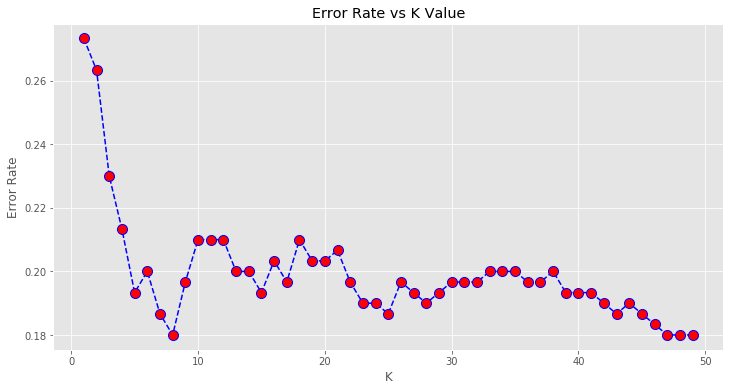

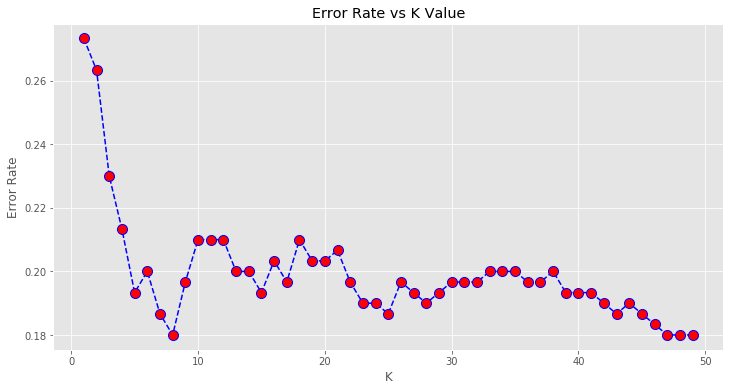

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 50), error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

## Retrain with new K Value

**Retrain your model with the best K value (up to you to decide what you want) and re-do the classification report and the confusion matrix.**

In [22]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

print("WITH K=8")
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

WITH K=8
[[127  25]
 [ 29 119]]
              precision    recall  f1-score   support

           0       0.81      0.84      0.82       152
           1       0.83      0.80      0.82       148

    accuracy                           0.82       300
   macro avg       0.82      0.82      0.82       300
weighted avg       0.82      0.82      0.82       300

WITH K=8
[[127  25]
 [ 29 119]]
              precision    recall  f1-score   support

           0       0.81      0.84      0.82       152
           1       0.83      0.80      0.82       148

    accuracy                           0.82       300
   macro avg       0.82      0.82      0.82       300
weighted avg       0.82      0.82      0.82       300

